In [1]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
from subprocess import call
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext

from pathlib import Path
from keras.applications import imagenet_utils

In [2]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [4]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [5]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [6]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'Images', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'Images',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 1778 images belonging to 4 classes.
Found 196 images belonging to 4 classes.


In [8]:
training.samples

1778

In [9]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=4,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/4
39/55 [====================>.........] - ETA: 1:03 - loss: 1.3901

c:\Users\Abdulmù\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (156284464 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


55/55 [==============================] - 252s 5s/step - loss: 1.2491 - val_loss: 0.5724
Epoch 2/4
55/55 [==============================] - 164s 3s/step - loss: 0.7006 - val_loss: 0.4421
Epoch 3/4
55/55 [==============================] - 172s 3s/step - loss: 0.5820 - val_loss: 0.4287
Epoch 4/4
55/55 [==============================] - 170s 3s/step - loss: 0.5358 - val_loss: 0.4366


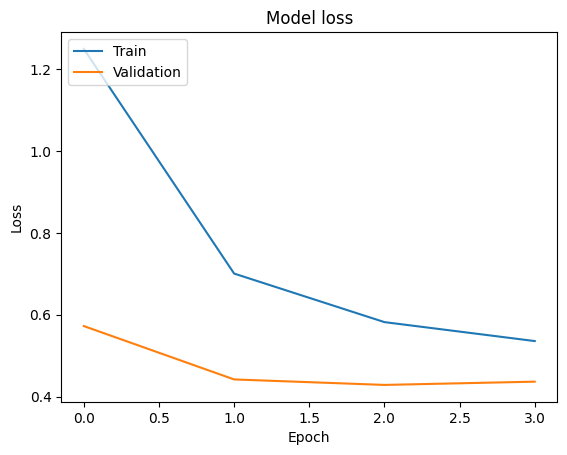

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
random_Concert = random.choice(os.listdir('Images/Concert'))
Concert_path = os.path.join('Images/Concert',random_Concert)
Concert = load_image(Concert_path)
random_FootballCrowd = random.choice(os.listdir('Images/Football Crowd'))
FootballCrowd_path = os.path.join('Images/Football Crowd',random_FootballCrowd)
FootballCrowd = load_image(FootballCrowd_path)

random_Parade = random.choice(os.listdir('Images/Parade'))
Parade_path = os.path.join('Images/Parade',random_Parade)
Parade = load_image(Parade_path)
random_Protest = random.choice(os.listdir('Images/Protest'))
Protest_path = os.path.join('Images/Protest',random_Protest)
Protest = load_image(Protest_path)



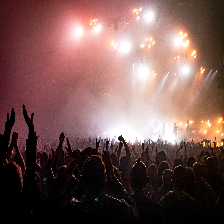

In [18]:
tf.keras.preprocessing.image.load_img(Concert_path, target_size=(224,224))

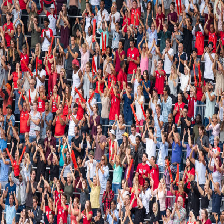

In [19]:
tf.keras.preprocessing.image.load_img(FootballCrowd_path, target_size=(224,224))

In [15]:
tf.keras.preprocessing.image.load_img(Concert_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(FootballCrowd_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(Parade_path, target_size=(224,224))
tf.keras.preprocessing.image.load_img(Protest_path, target_size=(224,224))
print(f'''Concert:{np.round(model.predict(Concert),4)}''')
print(f'''Football Crowd:{np.round(model.predict(FootballCrowd),4)}''')
print(f'''Parade:{np.round(model.predict(Parade),4)}''')
print(f'''Protest:{np.round(model.predict(Protest),4)}''')


1/1 [==============================] - 1s 661ms/step
Concert:[[0.9807 0.0013 0.0097 0.0083]]
1/1 [==============================] - 0s 59ms/step
Football Crowd:[[0.0503 0.7873 0.0747 0.0876]]
1/1 [==============================] - 0s 54ms/step
Parade:[[0.7384 0.0893 0.1694 0.0029]]
1/1 [==============================] - 0s 53ms/step
Protest:[[2.340e-02 9.000e-04 1.560e-02 9.601e-01]]


In [28]:
Speech_path = 'Images/62bdd4439316e875a43fd70da59c08f55b494a0a.jpg'
Speech = load_image(Speech_path)

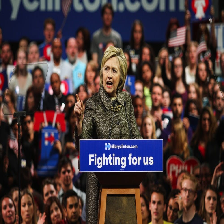

In [29]:
tf.keras.preprocessing.image.load_img(Speech_path, target_size=(224,224))


In [30]:
print(f'''Speech:{np.round(model.predict(Speech),2)}''')

1/1 [==============================] - 0s 57ms/step
Speech:[[0.12 0.08 0.02 0.77]]


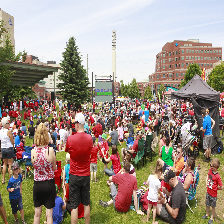

In [33]:
picnic_path = 'Images/picninc image.jpg'
picnic = load_image(picnic_path)
tf.keras.preprocessing.image.load_img(picnic_path, target_size=(224,224))


In [34]:
print(f'''picnic:{np.round(model.predict(picnic),2)}''')

1/1 [==============================] - 0s 58ms/step
picnic:[[0.25 0.02 0.05 0.69]]
